## Importing libraries
Here we are importing all the libraries required for the case study.

In [1023]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import OneHotEncoder
import plotly.express as px
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold
import array
import warnings
from pylab import rcParams
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.pipeline import Pipeline
%matplotlib inline


In [1024]:

df = pd.read_csv('AB_NYC_2019.csv')


## Loading the dataset

In [1025]:
df_copy = df.copy()
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  19-10-2018   
1  Entire home/apt    225               1                 45  21-05-2019   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  05-07-2019   
4  Entire home/apt     80              10                  9  19-11-2018   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

## Understanding the dataset

In [1026]:
df.shape

(48895, 16)

## Data Wrangling and Cleaning

In [1027]:
# Understanding types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Here we have almost 48.8k rows with 16 columns for each. It is composed of 3 float types, 7 int types and 6 object types.

In [1028]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

So, we can see there are around 10k null values in the last_review and review_per_month columns and a very few null values in name and host_name.

In [1029]:
df.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

-> From this we can see the mean price to be around 152 dollars.

-> Average availablity of an airbnb around a year is 112 days.


Notable that we have 5 locations in dataset and 3 room types.

In [1030]:
# Making sure if any duplicatd values.
df.duplicated().sum()

0

We do not have any duplicate rows in our dataset.

## Data Analysis and Visualization

In [1031]:
df.host_id.value_counts().iloc[:5]

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
Name: host_id, dtype: int64

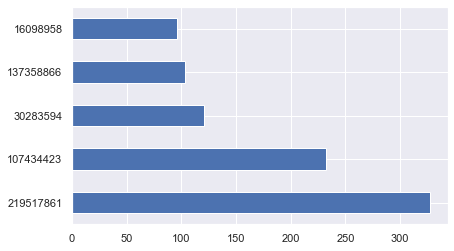

In [1032]:
df.host_id.value_counts().iloc[:5].plot(kind = 'barh')
plt.show()

We can observe that the highest times transaction done by a customer is 327 in the year 2019.

### Room Type

In [1033]:
# we noted that the room_type is only of 3 particular types.
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

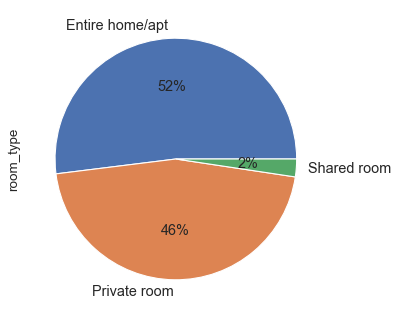

In [1034]:

fig = plt.figure(figsize=(5,5), dpi=80)
df['room_type'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=13)
plt.show()

Intresting to note that in our dataset, around 25k people (52%) choose to use a house while 22k(46%) for a private room. Only 1k(2%) people choose a shared room. This could mean more people who use airbnb , use it with family maybe for tours,visits,etc...

### Neighbourhood Groups - Location

In [1035]:
# There are 5 particular neighbourhood_group, which means 5 unique locations.
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

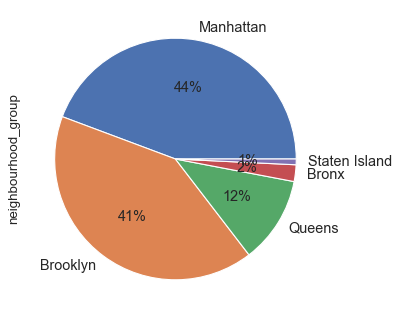

In [1036]:
fig = plt.figure(figsize=(5,5), dpi=80)
df['neighbourhood_group'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=13)
plt.show()

Manhattan is the city where most Airbnb transactions have occured with 44% of entire dataset. The least happend in Staten Island only 1%. Brooklyn consisted on 41% of transactions with 12% Queens and 2 % in Bronx.

### Neighbourhoods:

In [1037]:
df['neighbourhood'].value_counts().iloc[:5]

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Name: neighbourhood, dtype: int64

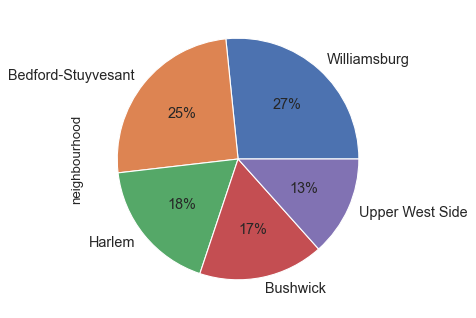

In [1038]:
fig = plt.figure(figsize=(5,5), dpi=80)
df['neighbourhood'].value_counts().iloc[:5].plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=13)
plt.show()

We can see that Williamsburg is the hottest area of transaction followed by Bedford-Stuyvesant.

This pie-chart shows the top 5 areas by percentage in the dataset.

### Price:

In [1039]:
df.price.value_counts().iloc[:10]

100    2051
150    2047
50     1534
60     1458
200    1401
75     1370
80     1272
65     1190
70     1170
120    1130
Name: price, dtype: int64

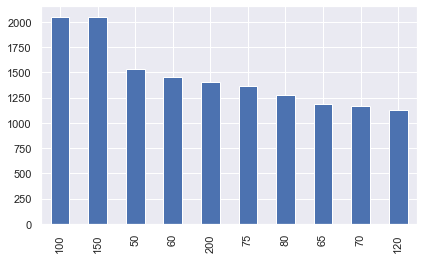

In [1040]:
df.price.value_counts().iloc[:10].plot(kind = 'bar')
plt.show()


Almost 2k+ airbnb's has a price of 100 dollars and 150 dollars each respectively.

1.5k airbnb's have around 50 dollars price.

In [1041]:
df.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64



The average pricing is around 152 dollars.

50% of data has price greater than 106 dollars.

The costliest airbnb has around 10k dollars as price.

In [1042]:
df[df['price'] == 10000.000000]

id                                             name   host_id  \
9151    7003697              Furnished room in Astoria apartment  20582832   
17692  13894339  Luxury 1 bedroom apt. -stunning Manhattan views   5143901   
29238  22436899                              1-BR Lincoln Center  72390391   

      host_name neighbourhood_group    neighbourhood  latitude  longitude  \
9151   Kathrine              Queens          Astoria  40.76810  -73.91651   
17692      Erin            Brooklyn       Greenpoint  40.73260  -73.95739   
29238    Jelena           Manhattan  Upper West Side  40.77213  -73.98665   

             room_type  price  minimum_nights  number_of_reviews last_review  \
9151      Private room  10000             100                  2  13-02-2016   
17692  Entire home/apt  10000               5                  5  27-07-2017   
29238  Entire home/apt  10000              30                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  
9151                0.04                               1                 0  
17692               0.16                               1                 0  
29238                NaN                               1                83



We have 3 airbnbs with 10k per night luxury stay, one private room and 2 home stay.

### Minimum Nights

In [1043]:
df['minimum_nights'].value_counts()

1      12720
2      11696
3       7999
30      3760
4       3303
       ...  
186        1
366        1
68         1
87         1
36         1
Name: minimum_nights, Length: 109, dtype: int64

In [1044]:
for i in range(1,11):
  print("Number of nights: ",i)
  print("Amount of trasactions:",len(df[df['minimum_nights'] == i]))

Number of nights:  1
Amount of trasactions: 12720
Number of nights:  2
Amount of trasactions: 11696
Number of nights:  3
Amount of trasactions: 7999
Number of nights:  4
Amount of trasactions: 3303
Number of nights:  5
Amount of trasactions: 3034
Number of nights:  6
Amount of trasactions: 752
Number of nights:  7
Amount of trasactions: 2058
Number of nights:  8
Amount of trasactions: 130
Number of nights:  9
Amount of trasactions: 80
Number of nights:  10
Amount of trasactions: 483


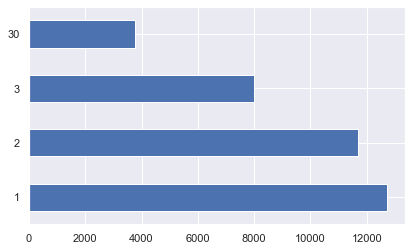

In [1045]:
df['minimum_nights'].value_counts().iloc[:4].plot(kind = 'barh')
plt.show()


We can observe that most of almost 12k people used 1 night stay in airbnb.

11k people choose 2 night stay while 7k choose 3 night stay.

Almost 3.7k stayed upto a month.

### Number of reviews

In [1046]:
df['number_of_reviews'].value_counts()

0      10052
1       5244
2       3465
3       2520
4       1994
       ...  
313        1
540        1
480        1
326        1
341        1
Name: number_of_reviews, Length: 394, dtype: int64

10k airbnbs dont have any reviews.

5.2k has around 1 review and the maximum number of reviews is 607 which only 1 airbnb has.

In [1047]:
df[df['number_of_reviews'] == 607]

id                        name  host_id host_name  \
2031  903972  Great Bedroom in Manhattan  4734398        Jj   

     neighbourhood_group neighbourhood  latitude  longitude     room_type  \
2031           Manhattan        Harlem  40.82085  -73.94025  Private room   

      price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
2031     49               1                607  21-06-2019               7.75   

      calculated_host_listings_count  availability_365  
2031                               3               293



Great Bedroom in Manhattan gets the highest reviews and it costs around 69 dollars.







### Availablity

In [1048]:
df['availability_365'].value_counts()

0      17533
365     1295
364      491
1        408
89       361
       ...  
195       26
183       24
196       24
181       23
202       20
Name: availability_365, Length: 366, dtype: int64

Around 1.3k airbnbs have 365 days availablity and rest doesnt.


In [1049]:
df[df['availability_365'] == 365].describe()

id       host_id     latitude    longitude        price  \
count  1.295000e+03  1.295000e+03  1295.000000  1295.000000  1295.000000   
mean   1.940195e+07  8.554698e+07    40.729014   -73.943275   250.769884   
std    1.197265e+07  8.786960e+07     0.057781     0.059799   550.497373   
min    2.539000e+03  2.787000e+03    40.507080   -74.242850    20.000000   
25%    8.725256e+06  8.931349e+06    40.687990   -73.983210    72.000000   
50%    2.065068e+07  4.634351e+07    40.730990   -73.954270   125.000000   
75%    3.027040e+07  1.565055e+08    40.762095   -73.921715   225.000000   
max    3.648315e+07  2.733930e+08    40.893740   -73.721730  9999.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count      1295.00000        1295.000000         841.000000   
mean         19.60000          10.220849           0.832545   
std          65.05093          22.095983           1.112493   
min           1.00000           0.000000           0.010000   
25%           1.00000           0.000000           0.130000   
50%           3.00000           2.000000           0.410000   
75%          30.00000          10.000000           1.000000   
max        1250.00000         183.000000           8.940000   

       calculated_host_listings_count  availability_365  
count                     1295.000000            1295.0  
mean                        13.158301             365.0  
std                         36.224171               0.0  
min                          1.000000             365.0  
25%                          1.000000             365.0  
50%                          2.000000             365.0  
75%                          7.000000             365.0  
max                        327.000000             365.0


Costliest airbnb with 365 days availablity costs around 10k dollars with average of 250 dollars.

### Reviews per month

In [1050]:
df_copy[df_copy['reviews_per_month'] > 1].reviews_per_month.value_counts().sum()

15908

15.9k reviews were above 1.


In [1051]:
df[df['reviews_per_month'] > 1]['reviews_per_month'].value_counts().iloc[:5]

2.00    406
3.00    222
4.00    130
1.15     90
1.05     88
Name: reviews_per_month, dtype: int64

Above 1, around 406 airbnbs have 2 reviews per month, 222 with 3 and 130 with 4.



In [1052]:
df['reviews_per_month'].max()

58.5

In [1053]:
df_copy[df['reviews_per_month'] == 58.5]

id                                               name    host_id  \
42075  32678719  Enjoy great views of the City in our Deluxe Room!  244361589   

      host_name neighbourhood_group     neighbourhood  latitude  longitude  \
42075   Row NYC           Manhattan  Theater District  40.75918  -73.98801   

          room_type  price  minimum_nights  number_of_reviews last_review  \
42075  Private room    100               1                156  07-07-2019   

       reviews_per_month  calculated_host_listings_count  availability_365  
42075               58.5                               9               299



Enjoy great views in Manhattan has the highest reviews per month. They offer Private room and is worth 100 dollars a night.



### Calculate host listing

In [1054]:
df.calculated_host_listings_count.value_counts().iloc[:5]

1    32303
2     6658
3     2853
4     1440
5      845
Name: calculated_host_listings_count, dtype: int64

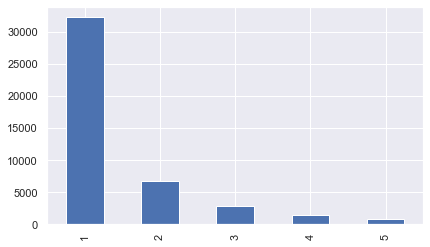

In [1055]:
df.calculated_host_listings_count.value_counts().iloc[:5].plot(kind = 'bar')
plt.show()

Most hosts used the listings only once that is around 32.3k and 6.6k around 2 times.


In [1056]:
df.calculated_host_listings_count.describe()

count    48895.000000
mean         7.143982
std         32.952519
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64


On an average, a host has used listings 7 times.

Maximum times being 327.

### Bivariate Analysis

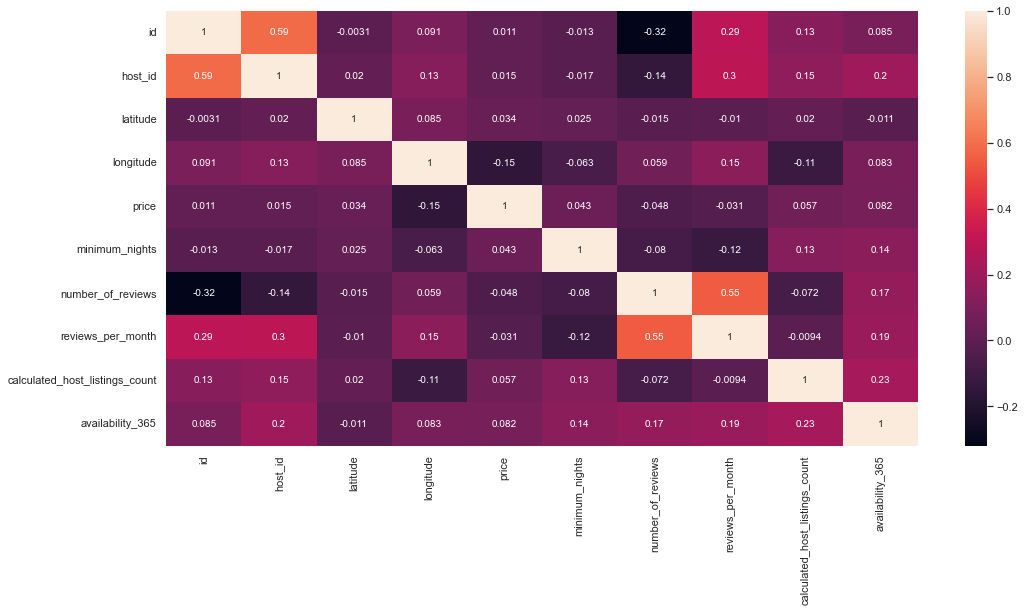

In [1057]:
corr = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
plt.show()

### Maps - Scatterplots

In [1058]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [1059]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

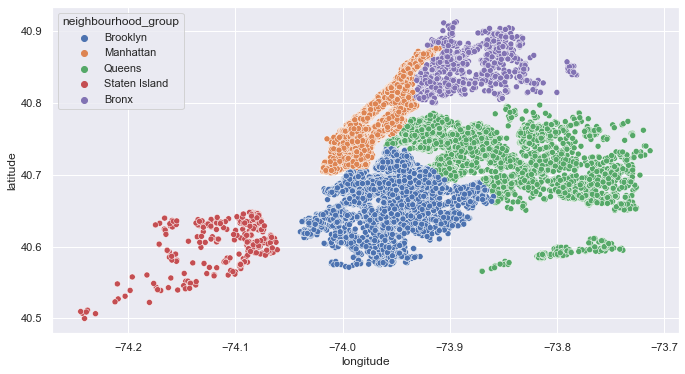

In [1060]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)
plt.show()

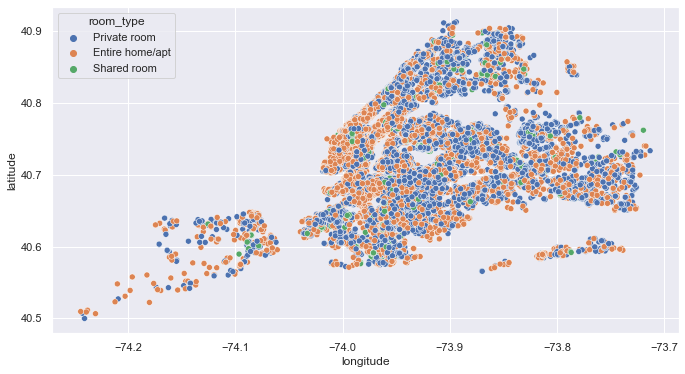

In [1061]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.room_type)
plt.show()

#### Latitude and Longitude with room availablity for 365 days

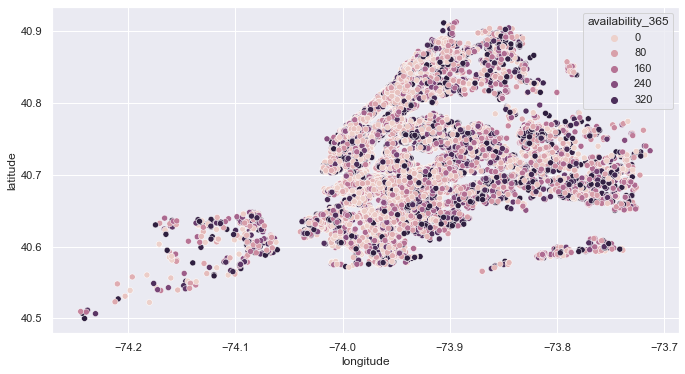

In [1062]:
plt.figure(figsize=(10,6))
sns.scatterplot(df_copy.longitude,df_copy.latitude,hue=df_copy.availability_365)
plt.show()

### Plots

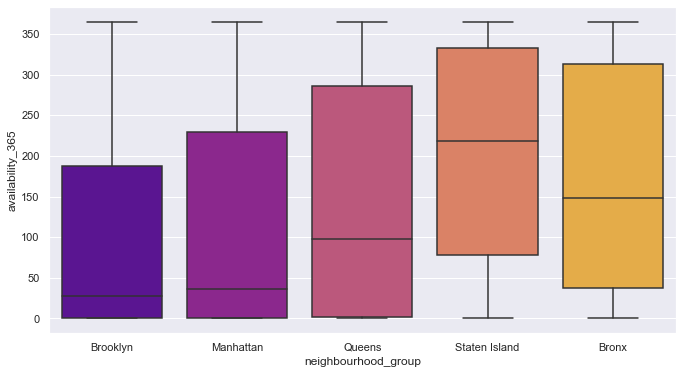

In [1063]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=df_copy, x='neighbourhood_group',y='availability_365',palette='plasma')

Staten Island has th highest average airbnb availablity.

In [1064]:
df['neighbourhood'].value_counts().iloc[:10]

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

<AxesSubplot:>

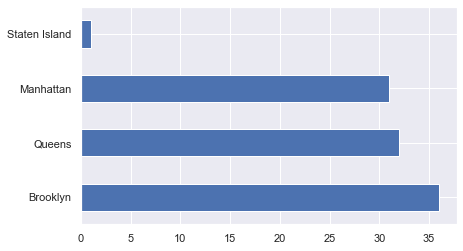

In [1065]:
# Rooms with top 100 reviews by neighbourhood
dfr=df.sort_values(by=['number_of_reviews'],ascending=False).head(100)
dfr['neighbourhood_group'].value_counts().plot(kind = 'barh')

If we look at the top 100 airbnb's with number of reviews, Brooklyn has highest reviews followed by Queens and then Manhattan.

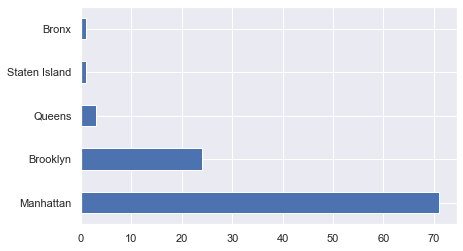

In [1066]:
# Rooms with top 100 expensive by neighbourhood
dfr=df.sort_values(by=['price'],ascending=False).head(100)
dfr['neighbourhood_group'].value_counts().plot(kind = 'barh')
plt.show()

If we take the top 100 airbnbs then almost 70+ comes in Manhattan, followed by 25 in Brooklyn.

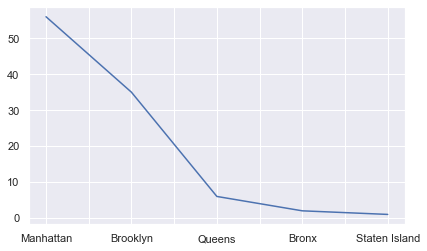

In [1067]:
# Rooms with top 100 minimum_nights  by neighbourhood
dfr=df.sort_values(by=['minimum_nights'],ascending=False).head(100)
dfr['neighbourhood_group'].value_counts().plot()
plt.show()

Manhattan has highest airbnbs with highest minimum nights.

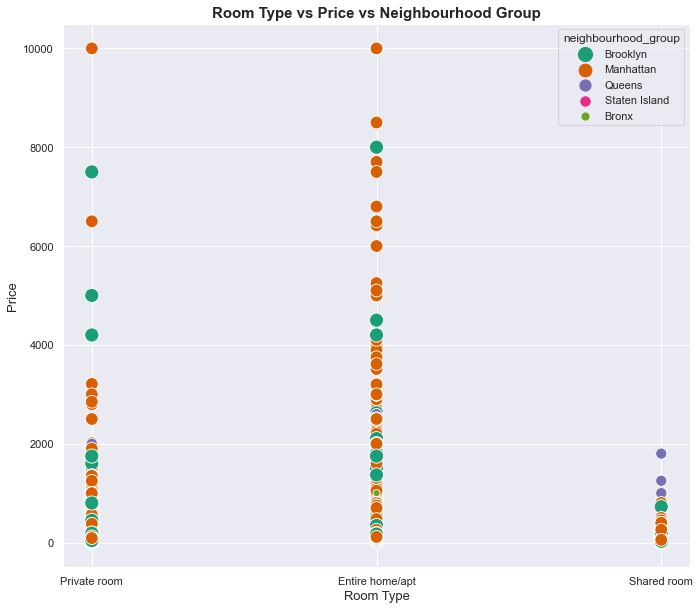

In [1068]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="room_type", y="price",
            hue="neighbourhood_group", size="neighbourhood_group",
            sizes=(50, 200), palette="Dark2", data=df)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price vs Neighbourhood Group",size=15, weight='bold')
plt.show()

### Data Cleaning

We dont require host_id,name,id,host_name and last_review as these do not any way effect for further analysis or pre-processing. So we can drop them.

In [1069]:
## We can remove the unwanted columns. Here id,name , host_name and last_review doesnt help us in anyway in our approch for data analysis.
df.drop(['host_id','name','latitude','longitude','id','host_name','last_review'], axis=1, inplace=True)
df.head()

neighbourhood_group neighbourhood        room_type  price  minimum_nights  \
0            Brooklyn    Kensington     Private room    149               1   
1           Manhattan       Midtown  Entire home/apt    225               1   
2           Manhattan        Harlem     Private room    150               3   
3            Brooklyn  Clinton Hill  Entire home/apt     89               1   
4           Manhattan   East Harlem  Entire home/apt     80              10   

   number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0                  9               0.21                               6   
1                 45               0.38                               2   
2                  0                NaN                               1   
3                270               4.64                               1   
4                  9               0.10                               1   

   availability_365  
0               365  
1               355  
2               365  
3               194  
4                 0

Since we removed 4 columns from the dataframe, we now have to deal with 12 columns.

In [1070]:
df.isna().sum()

neighbourhood_group                   0
neighbourhood                         0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [1071]:
df['reviews_per_month'].describe()

count    38843.000000
mean         1.373221
std          1.680442
min          0.010000
25%          0.190000
50%          0.720000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64

We can actually fill all the rows of column of reviews_per_month as 0 where its null value, this is because the data is null only because no one has reviewd it and hence the number of review is 0 here.

In [1072]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
# Missing value implies there are no reviews for the location.

In [1073]:
df.isna().sum()

neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In the availablity_365 , if we have 365 days availablity then we can directly assgn them as 365 itself and 0 for rest because they isnt availavle for 365 days.

## Hypothesis Testing

Here we have taken a dataset where we have room types as homes and non-homes and their total availablity.

In [1074]:
df_copy.loc[df_copy['room_type'] == 'Entire home/apt', 'home'] = True
df_copy.loc[df_copy['room_type'] != 'Entire home/apt', 'home'] = False


In [1075]:
df_hyp = df_copy[['home','availability_365']]
df_hyp.head()

home  availability_365
0  False               365
1   True               355
2  False               365
3   True               194
4   True                 0

In [1076]:
df_hyp.groupby('home').count()

availability_365
home                   
False             23486
True              25409

We can find that almost 23k airbnb's are non-homes that is a private room or shared room while 25k of them are homes.

In [1077]:
home = df_hyp['availability_365'][df_hyp['home']==True]
non_home = df_hyp['availability_365'][df_hyp['home']==False]


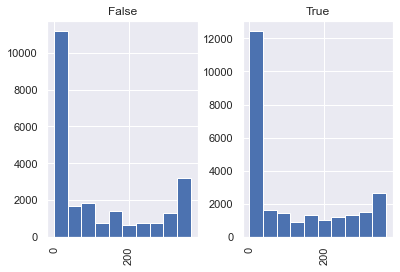

In [1078]:
import matplotlib.pyplot as plt
%matplotlib inline
df_hyp.hist(by ='home')
plt.show()

Following is the hist representation of both homes and non-homes.

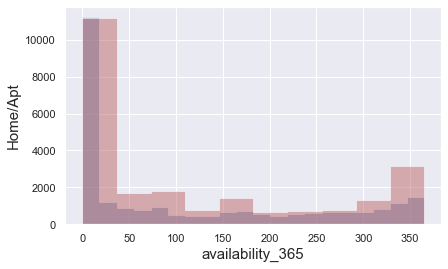

In [1079]:
import seaborn as sns
home.hist(histtype='stepfilled', alpha=.5, bins=20)     # default number of bins = 10
non_home.hist(histtype='stepfilled', alpha=.5,color=sns.desaturate("indianred", 0.75 ), bins=10)
plt.xlabel('availability_365',fontsize=15)
plt.ylabel('Home/Apt',fontsize=15)
plt.show()


On an average the non-homes were more as compared to that of homes data.

#### Hypothesis:

Null hypothsis : Availablity has no influence over airbnb being home or non-home.

Alternate : Availablity has an influence over airbnb being home or non-home.

#### Test Statics
Using the mean availablity difference of homes and non-homes.

In [1080]:
means_table =df_hyp.groupby('home').mean()
means_table

availability_365
home                   
False        113.712850
True         111.920304

On an average non homes availablity is more in a year than homes.

In [1081]:
observatied_diff = means_table['availability_365'][1] - means_table['availability_365'][0]
observatied_diff

-1.7925463792831238

#### Predicting the Statistic under null hypothesis
Simulating the null hypothesis under permuation


In [1082]:
shuffled = df_hyp.sample(len(df_hyp),replace = False)
shuffled

home  availability_365
27728   True                 0
14228   True               148
3705   False               304
4950   False                 0
1192    True                24
...      ...               ...
40153  False                 0
12092  False                 0
24865   True                 0
1222   False                23
33229   True               365

[48895 rows x 2 columns]

In [1083]:
shuffled_availablity = shuffled['availability_365']
type(shuffled_availablity)

pandas.core.series.Series

In [1084]:
orig_and_shuff = df_hyp.assign(shuffled_availablity = shuffled_availablity.values)
orig_and_shuff

home  availability_365  shuffled_availablity
0      False               365                     0
1       True               355                   148
2      False               365                   304
3       True               194                     0
4       True                 0                    24
...      ...               ...                   ...
48890  False                 9                     0
48891  False                36                     0
48892   True                27                     0
48893  False                 2                    23
48894  False                23                   365

[48895 rows x 3 columns]

In [1085]:
all_group_means = orig_and_shuff.groupby('home').mean()
all_group_means

availability_365  shuffled_availablity
home                                         
False        113.712850            112.936686
True         111.920304            112.637727

In [1086]:
difference = all_group_means['shuffled_availablity'][0]- all_group_means['shuffled_availablity'][1]
difference

0.2989588953688127

In [1087]:
observatied_diff

-1.7925463792831238

#### One simulation

In [1088]:
shuffled = df_hyp.sample(len(df_hyp),replace = False)
shuffled_availablity = shuffled['availability_365']
orig_and_shuff = df_hyp.assign(shuffled_availablity = shuffled_availablity.values)
all_group_means = orig_and_shuff.groupby('home').mean()
differences = abs(all_group_means['shuffled_availablity'][0] - all_group_means['shuffled_availablity'][1])

In [1089]:
differences

0.1869957574972716

#### Permutation test
Simulating for many times and collecting the differences in an array

In [1090]:

differences = np.zeros(5000)

In [1091]:
for i in range(5000):
    shuffled = df_hyp.sample(len(df_hyp),replace = False)
    shuffled_availablity = shuffled['availability_365']
    orig_and_shuffled = df_hyp.assign(shuffled_availablity = shuffled_availablity.values)
    all_group_means = orig_and_shuffled.groupby('home').mean()
    difference = (all_group_means['shuffled_availablity'][0] - all_group_means['shuffled_availablity'][1])
    differences[i] = difference


In [1092]:
differnces_df = pd.DataFrame(differences)
differnces_df

0
0    -0.155451
1     0.485278
2    -0.385524
3     1.725196
4    -1.213965
...        ...
4995 -1.364315
4996  0.986391
4997  1.376892
4998  0.286751
4999 -3.801463

[5000 rows x 1 columns]

In [1093]:
import matplotlib
%matplotlib inline
plt.style.use('fivethirtyeight')

-1.7925463792831238


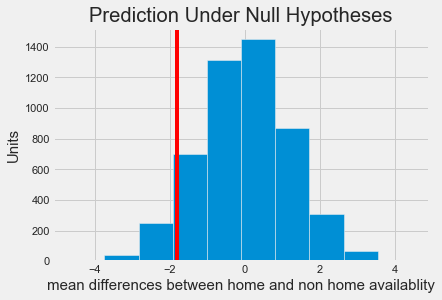

In [1094]:
differnces_df.hist()
plt.title('Prediction Under Null Hypotheses');
plt.xlabel('mean differences between home and non home availablity',fontsize=15)
plt.ylabel('Units',fontsize=15);
plt.axvline(observatied_diff, color='red');
print(observatied_diff)

In [1095]:
np.count_nonzero(differences <= observatied_diff)/differences.size

0.0714

The empirical P-value is nearly 0

##### Therefore, we reject the null hypothesis and go for alternate hypothesis. 
##### Therefore, Availablity do have an influence on airbnb being home or non-home.

Null hypothsis : Average availablity of Airbnbs would be same even if we take a sample of availablity data.

Alternate : Average availablity of Airbnbs would be different if we take a sample of availablity data.

In [1096]:

warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 8,8
rcParams['font.size'] = 30
sns.set()
np.random.seed(8)

In [1097]:
def plot_distribution(inp):
    plt.figure()
    ax = sns.distplot(inp)
    ax.set_xlim([30, 365])
    plt.axvline(np.mean(inp), color="k", linestyle="dashed", linewidth=3)
    _, max_ = plt.ylim()
    plt.text(
        inp.mean() + inp.mean() / 10,
        max_ - max_ / 10,
        "Mean: {:.2f}".format(inp.mean()),
    )
    return plt.figure

A function to carry out plotting for distributions.

In [1098]:
df_copy.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'home'],
      dtype='object')

We are intrested to get the data of airbnb's available over a month.

In [1099]:
df_hyp = df_copy[['neighbourhood_group','availability_365']]
df_hyp = df_hyp[df_hyp['availability_365'] > 30]
df_hyp.head()

neighbourhood_group  availability_365
0            Brooklyn               365
1           Manhattan               355
2           Manhattan               365
3            Brooklyn               194
5           Manhattan               129

We can visualize the distribution with its mean value for entire dataframe.

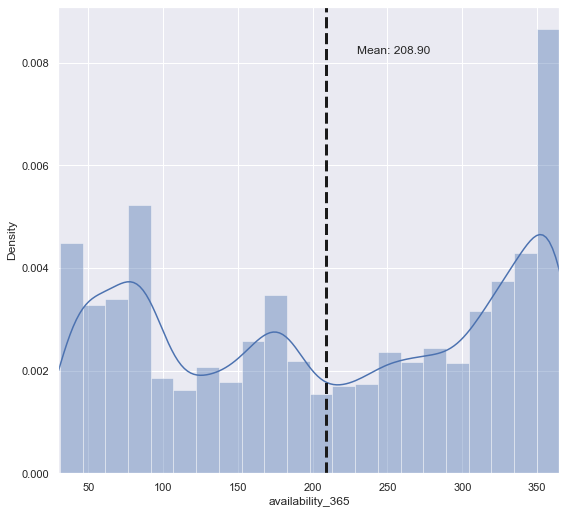

In [1100]:
plot_distribution(df_hyp['availability_365'])
plt.show()

I have taken a large sample of data as my data is not normal taking small sample size for t-test would be invalid.

In [1101]:
sample_size = 2000
avail_sample=np.random.choice(df_hyp['availability_365'],sample_size)
avail_sample

array([342, 127,  85, ...,  91,  39, 297])

In [1102]:
np.mean(avail_sample)

210.0335

We can visualize the distribution with its mean value for sample dataframe.

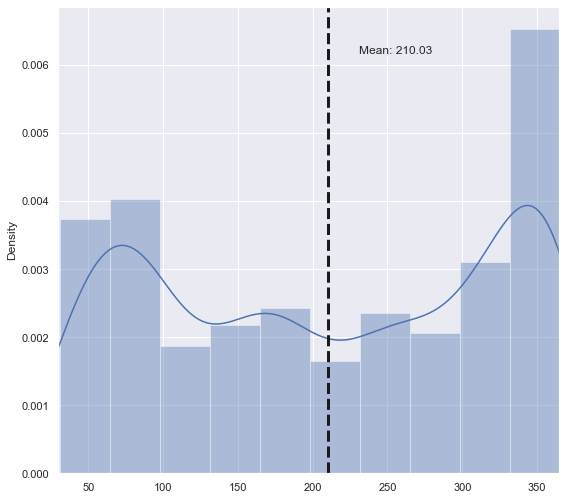

In [1103]:
plot_distribution(avail_sample)
plt.show()

Now we can take both homes and non-homes and plot and overlay to get the mean of each on graph.

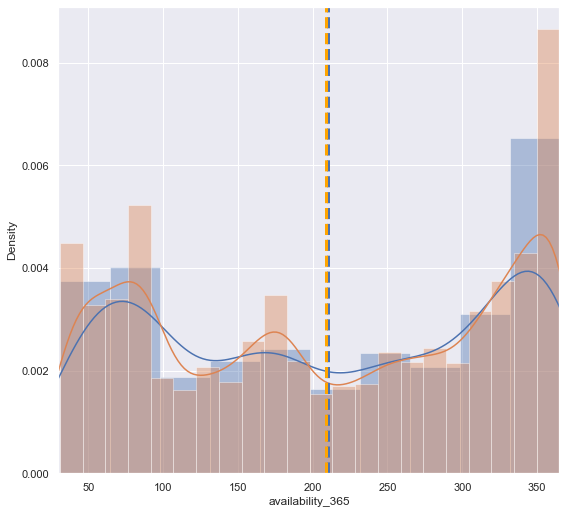

In [1104]:
plt.figure()
ax1 = sns.distplot(avail_sample)
ax2 = sns.distplot(df_hyp['availability_365'])
ax1.set_xlim([30, 365])
ax2.set_xlim([30, 365])
plt.axvline(np.mean(avail_sample), color='b', linestyle='dashed', linewidth=3)
plt.axvline(np.mean(df_hyp['availability_365']), color='orange', linestyle='dashed', linewidth=3)
plt.show()

I have use Scipy library to import ttest_ind which helps us to carry out the t-test and give us the p-value.

In [1105]:
def compare_2_groups(arr_1, arr_2, alpha):
    stat, p = ttest_ind(arr_1, arr_2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('Same distributions hence we fail to reject H0(Null Hypothesis)')
    else:
        print('Different distributions hence we reject H0(Null Hypothesis)')

compare_2_groups(df_hyp['availability_365'], avail_sample, 0.05)

Statistics=-0.436, p=0.663
Same distributions hence we fail to reject H0(Null Hypothesis)


#### Here we fail to reject H0 and hence we accept the null hypothesis itself that the average availablity of Airbnbs would be same even if we take a sample of availablity data.

## Encoding Data and Outlier removal.

We can first see the box plot of the price and find some outliers and remove them so that we can do better in further steps.

In [1106]:

fig = px.box(df, y="price")
fig.update_layout(
    autosize=False,
    width=500,
    height=400
)
fig.show()

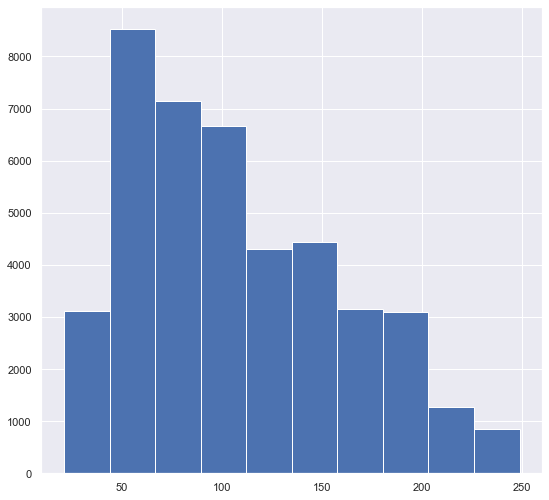

In [1107]:
dfp = df["price"][df["price"] < 250]
dfp[dfp > 20].hist()
plt.show()

After experimenting around values the range of (20,250) has a good gaussian wise distribution and hence we can go ahead with data in this range and remove others as outliers.

In [1108]:
df=df[df["price"]<250]
df=df[df["price"]>20]
df['room_type'].value_counts()

Private room       21722
Entire home/apt    19770
Shared room         1090
Name: room_type, dtype: int64

In [1109]:
fig = px.box(df, y="price")
fig

This is the final price data on which we are performing the rest of operations.

## Linear Regression

In [1110]:
def linear(x,z):
  global X,y,predictions,residue
  X = df_reg[x].values.reshape(-1,1)
  y = df_reg[z].values.reshape(-1,1)


  #3 Feature Scaling
  from sklearn.preprocessing import StandardScaler
  sc_X = StandardScaler()
  sc_y = StandardScaler()

  X = sc_X.fit_transform(X)
  y = sc_X.fit_transform(y)

  from sklearn.linear_model import LinearRegression
  reg = LinearRegression()
  reg.fit(X, y)

  print("The linear model is: Y = {:.2} + {:.2}X".format(reg.intercept_[0], reg.coef_[0][0]))

  print("Regression Intercept : ",reg.intercept_[0])


  predictions = reg.predict(X)
  rms = mean_squared_error(y, predictions, squared=False)

  fig = px.scatter(
    df_reg, x=x, y=z, opacity=0.65,
    trendline='ols', trendline_color_override='darkblue')
  fig.show()

  # Plot the residuals after fitting a linear model
  sns.residplot(x=X, y=y, lowess=True, color="g")

  print("RMSE is: ", rms)
  x2 = sm.add_constant(X)

  est = sm.OLS(y, x2)
  #OLS is Ordinary Least Squares

  #est.TAB
  est2 = est.fit()
  print(est2.summary())

  residue = y - predictions

I defined a function here that will help us automatically do the regression and show the plot and OLS results.

In [1111]:
df_reg = df[['number_of_reviews','reviews_per_month']]
df_reg = df_reg[df_reg['number_of_reviews']<400]
df_reg = df_reg[df_reg['reviews_per_month']<15]
df_reg

number_of_reviews  reviews_per_month
0                      9               0.21
1                     45               0.38
2                      0               0.00
3                    270               4.64
4                      9               0.10
...                  ...                ...
48890                  0               0.00
48891                  0               0.00
48892                  0               0.00
48893                  0               0.00
48894                  0               0.00

[42536 rows x 2 columns]

Here we are plotting thr linear model for this simple linear regression. We can analyze the model and get the regression Intercept.

Also i have plotted the residue plot at the end so that we can see how the difference between actual value and prediction is.

The linear model is: Y = 1.1e-16 + 0.6X
Regression Intercept :  1.1487249339260775e-16


RMSE is:  0.8007634689812881
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                 2.380e+04
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:19:52   Log-Likelihood:                -50905.
No. Observations:               42536   AIC:                         1.018e+05
Df Residuals:                   42534   BIC:                         1.018e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.776e-17  

number_of_reviews  reviews_per_month  Predictions   Residue
0                9.0               0.21    -0.204685 -0.370260
1               45.0               0.38     0.285444 -0.751599
2                0.0               0.00    -0.327217 -0.382115
3              270.0               4.64     3.348749 -1.088766
4                9.0               0.10    -0.204685 -0.440653

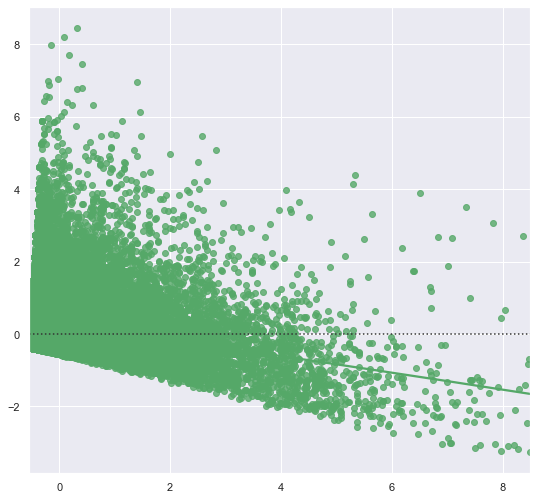

In [1112]:
linear('number_of_reviews','reviews_per_month')
df_n = pd.DataFrame(predictions, columns = ['Predictions'])
df_reg_new = pd.concat([df_reg,df_n],axis = 1)
df_n = pd.DataFrame(residue, columns = ['Residue'])
df_reg_new = pd.concat([df_reg_new,df_n],axis = 1)
df_reg_new[['number_of_reviews','reviews_per_month','Predictions','Residue']].head()

We can from here interpret the fact that R2 is almost 0.35 which means the model is considered weak in nature and not particularly weak. We have also got our RMSE around 0.8 which is fine to an extent.

In [1116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [1117]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(29807, 8)
(29807, 1)
(12775, 8)
(12775, 1)


This is our linear model and we can see the intercept and coefficents at the end.

In [1120]:

print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value -4.042427893150567


mean_absolute_error : 107.7816111401271


mean_squared_error :  14425.210303075137


root_mean_squared_error :  120.10499699460942


## Classification

In [1124]:
df_classif = df

In [1125]:
df_classif['availability_365'] = df_classif['availability_365'].apply(lambda x: 1 if x == 365 else 0)

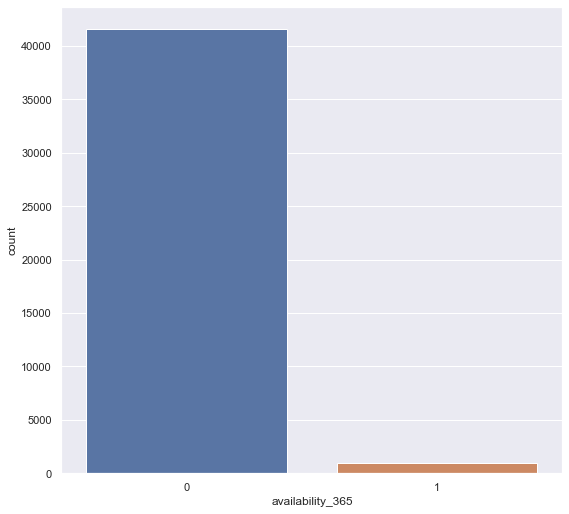

In [1126]:
sns.countplot(df_classif['availability_365'])
plt.show()